In [1]:
import sys

sys.path.append("../")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import data.drawings.make_tasks as drawing_tasks
from src.analysis_utilities import SynthesisExperimentAnalyzer
from src.config_builder import ExperimentType

/opt/conda/envs/laps/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
sns.set_theme(style="whitegrid", font_scale=1.25, rc={'figure.figsize':(12, 8)})

In [5]:
%config InlineBackend.figure_format = 'retina'

In [38]:
EXPERIMENT_NAME = "runs_re2"
DOMAIN = "re2"

# EXPERIMENT_NAME = "runs_clevr"
# DOMAIN = "clevr"

COMPUTE_LIKELIHOODS = True

FIGURES_DIR = os.path.join("figures", EXPERIMENT_NAME)
FIGURES_DOMAIN_DIR = os.path.join("figures", EXPERIMENT_NAME, DOMAIN)
os.makedirs(FIGURES_DOMAIN_DIR, exist_ok=True)

In [39]:
analyzer = SynthesisExperimentAnalyzer(
    experiment_name=EXPERIMENT_NAME,
    allow_incomplete_results=True,
    compute_likelihoods=COMPUTE_LIKELIHOODS,
    batch_size = 96,
    seeds = [111, 222, 333],
)

Experiment directory: ../experiments_iterative/outputs/runs_re2
Available domains: ['re2']


# Analysis 1: Tasks solved over time

### Tasks solved vs. LAPS iteration

In [40]:
df = analyzer.get_synthesis_results_for_domain(DOMAIN)
df

,request,task,programs,best_search_time,split,seed,iteration,experiment_type
0,"{'constructor': '->', 'arguments': [{'construc...",re2_train_0_if_the_word_ends_with_any_letter_a...,[],NaN,train,111,0,baseline_dreamcoder
1,"{'constructor': '->', 'arguments': [{'construc...",re2_train_1_if_there_is_consonant_replace_that...,[],NaN,train,111,0,baseline_dreamcoder
2,"{'constructor': '->', 'arguments': [{'construc...",re2_train_2_if_the_word_ends_with_consonant_s_...,[],NaN,train,111,0,baseline_dreamcoder
3,"{'constructor': '->', 'arguments': [{'construc...",re2_train_3_if_there_is_d_replace_that_with_y,[],NaN,train,111,0,baseline_dreamcoder
4,"{'constructor': '->', 'arguments': [{'construc...",re2_train_4_if_there_is_b_add_k_before_that,[],NaN,train,111,0,baseline_dreamcoder
...,...,...,...,...,...,...,...,...
20725,"{'constructor': '->', 'arguments': [{'construc...",re2_test_495_if_there_is_vowel_n_replace_that_...,[],NaN,test,333,9,baseline_dreamcoder
20726,"{'constructor': '->', 'arguments': [{'construc...",re2_test_496_if_the_word_ends_with_any_letter_...,[{'program': '(lambda (_rflatten (_rappend _h ...,54.615056,test,333,9,baseline_dreamcoder
20727,"{'constructor': '->', 'arguments': [{'construc...",re2_test_497_if_the_word_starts_with_any_lette...,[{'program': '(lambda (#(lambda (lambda (lambd...,73.640505,test,333,9,baseline_dreamcoder
20728,"{'constructor': '->', 'arguments': [{'construc...",re2_test_498_if_there_is_vowel_r_add_u_before_...,[],NaN,test,333,9,baseline_dreamcoder


In [41]:
df_results = (
    df.groupby(["experiment_type", "seed", "iteration", "split"])
    .best_search_time.count()
    .reset_index(name="n_solved")
)

# Duplicate "benchmark_enumeration" for n_iterations
df_list = [df_results[df_results.experiment_type != "enumeration"]]
for iteration in sorted(df_results.iteration.unique()):
    df_tmp = df_results[df_results.experiment_type == "enumeration"].copy()
    df_tmp["iteration"] = iteration
    df_list.append(df_tmp)
df_results = pd.concat(df_list, axis=0).reset_index(drop=True)

df_results

,experiment_type,seed,iteration,split,n_solved
0,baseline_dreamcoder,111,0,test,67
1,baseline_dreamcoder,111,0,train,15
2,baseline_dreamcoder,111,1,train,31
3,baseline_dreamcoder,111,2,train,54
4,baseline_dreamcoder,111,3,test,130
5,baseline_dreamcoder,111,3,train,71
6,baseline_dreamcoder,111,4,train,97
7,baseline_dreamcoder,111,5,train,116
8,baseline_dreamcoder,111,6,test,207
9,baseline_dreamcoder,111,6,train,131


Text(0.5, 1.0, 're2')

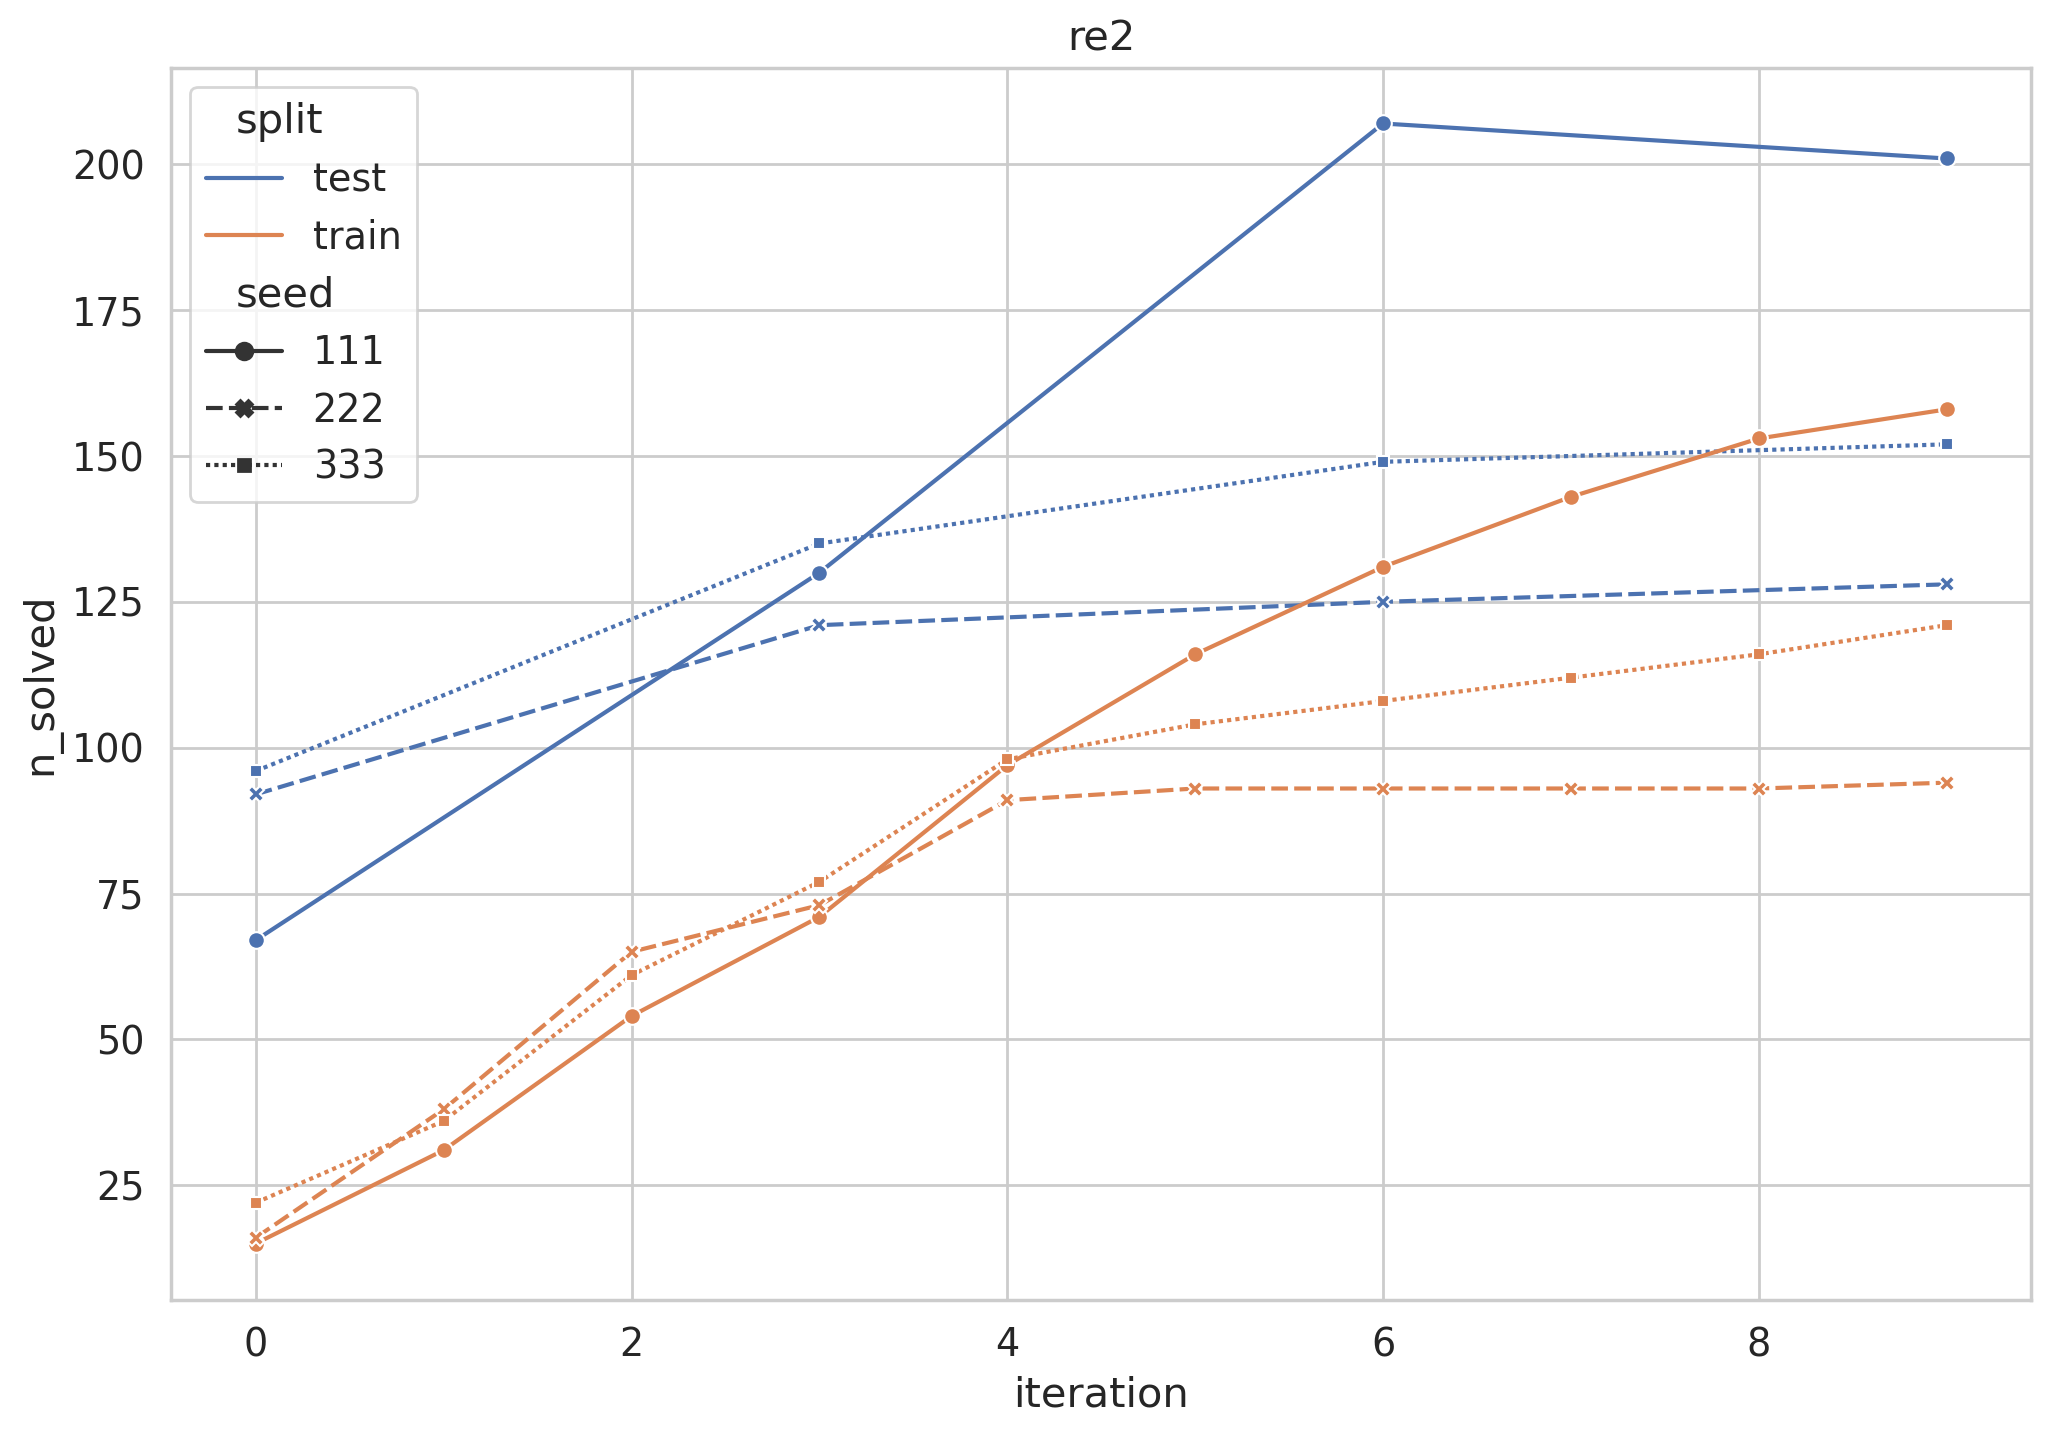

In [42]:
sns.lineplot(
    data=df_results, 
    x="iteration", 
    y="n_solved", 
    hue="split", 
    style="seed", 
    markers=True,
)
plt.title(f"{DOMAIN}")

Text(0.5, 1.0, 're2')

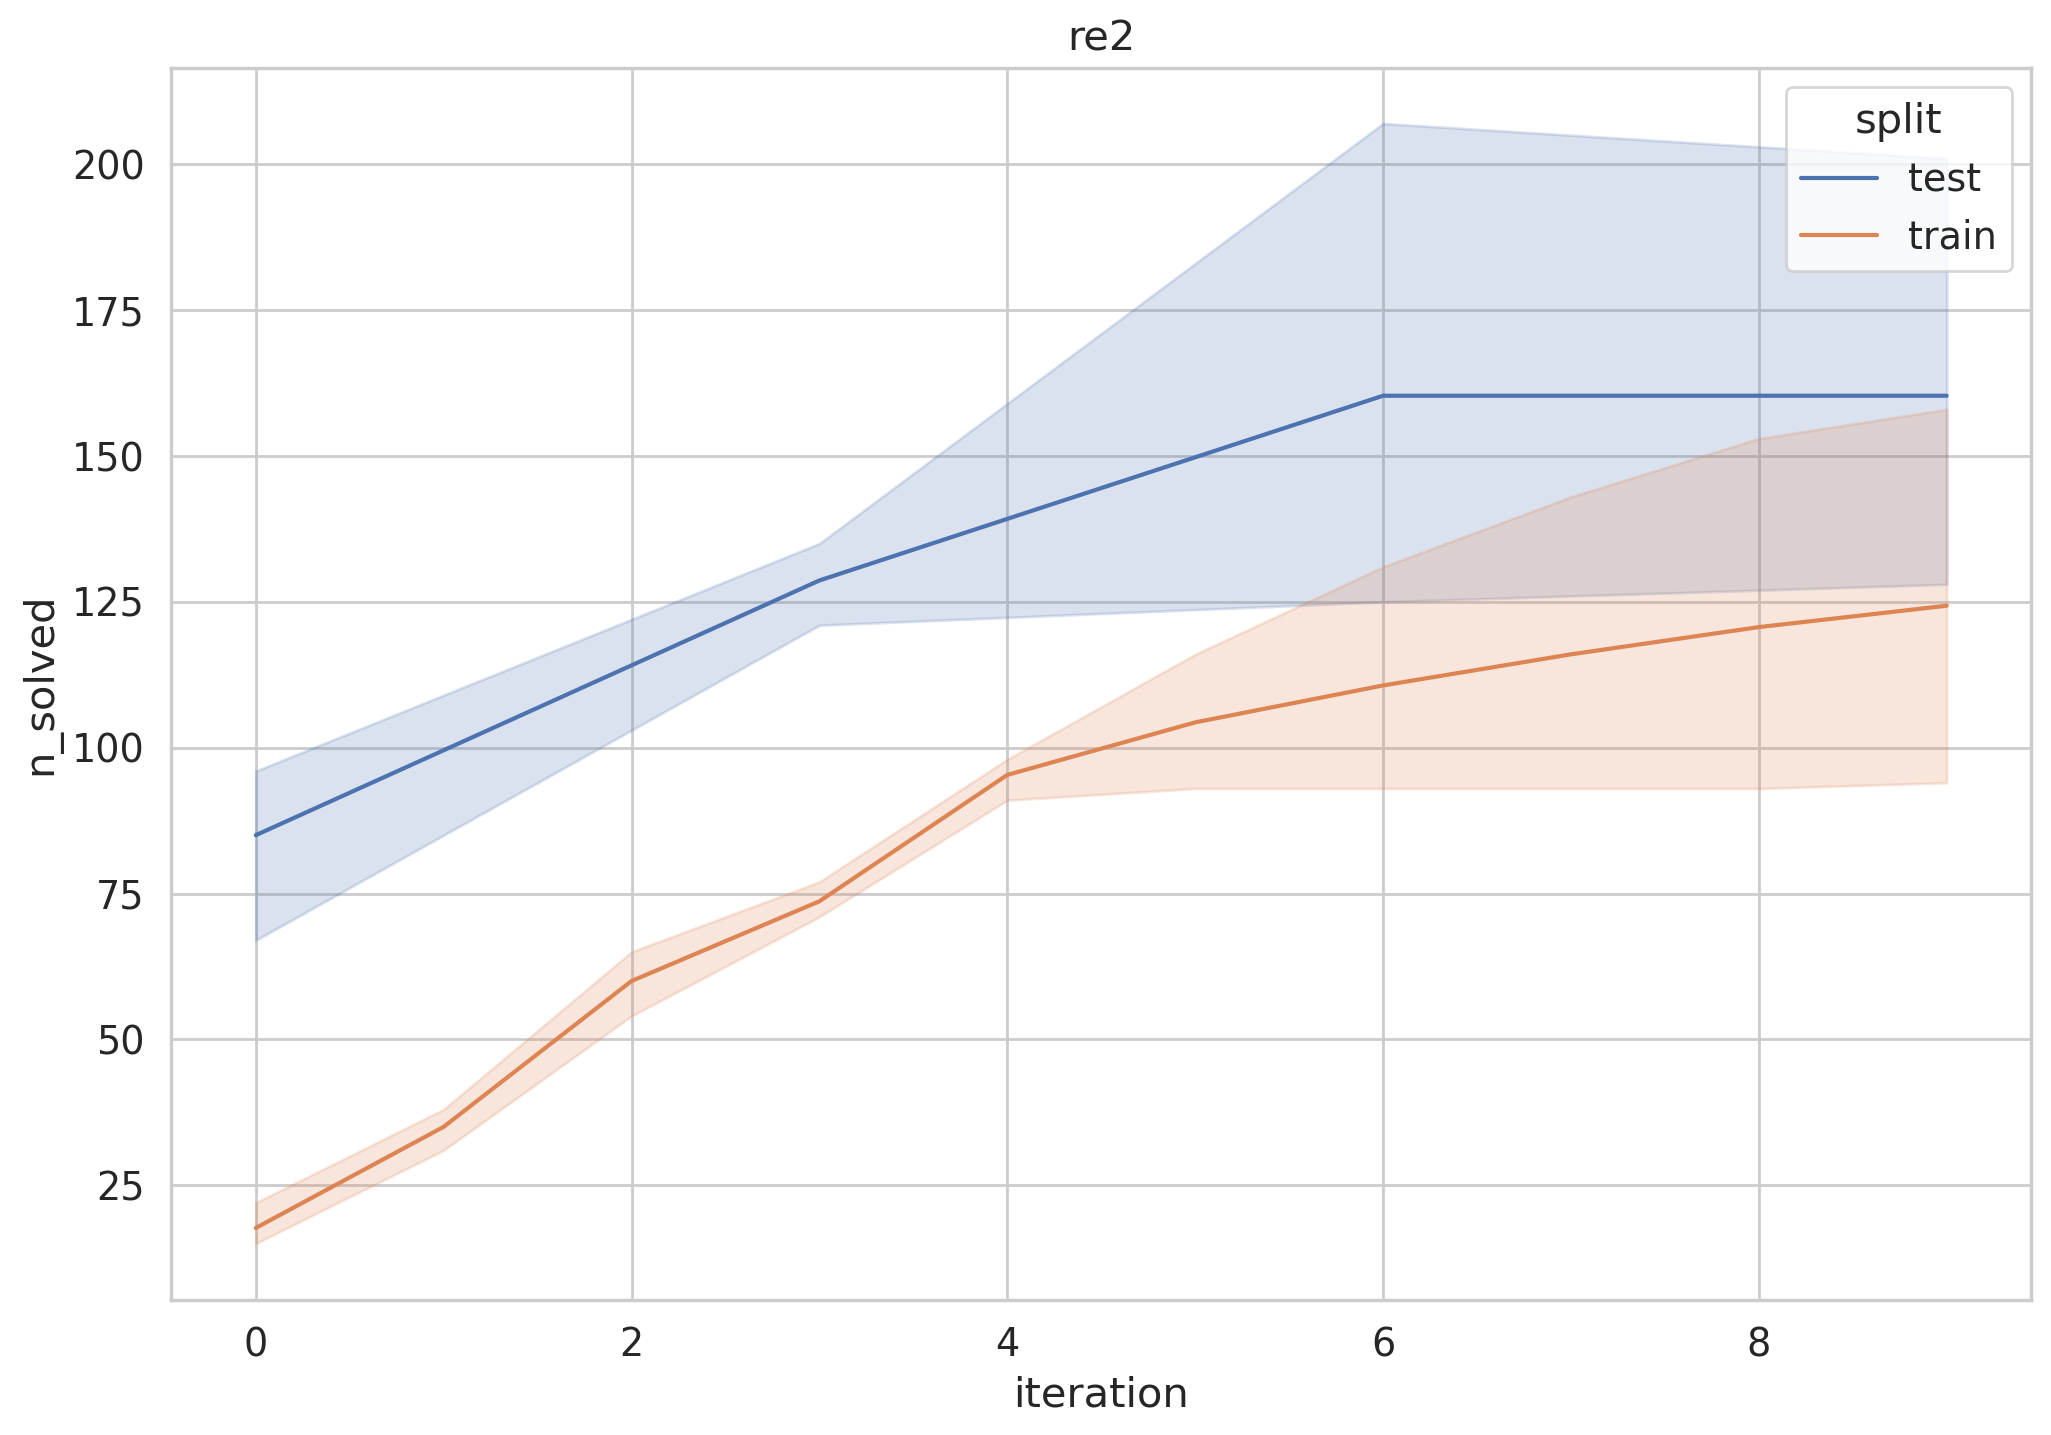

In [43]:
sns.lineplot(
    data=df_results, 
    x="iteration", 
    y="n_solved", 
    hue="split", 
    markers=True,
)
plt.title(f"{DOMAIN}")

### Tasks solved vs. search time

In [44]:
df_search_time = analyzer.get_search_time_results_for_domain(DOMAIN)
df_search_time

Using enumeration_timeout: 1000


,time,n_solved,experiment_type,seed,iteration,split
0,0,0,baseline_dreamcoder,111,0,test
1,1,0,baseline_dreamcoder,111,0,test
2,2,0,baseline_dreamcoder,111,0,test
3,3,0,baseline_dreamcoder,111,0,test
4,4,0,baseline_dreamcoder,111,0,test
...,...,...,...,...,...,...
42037,996,121,baseline_dreamcoder,333,9,train
42038,997,121,baseline_dreamcoder,333,9,train
42039,998,121,baseline_dreamcoder,333,9,train
42040,999,121,baseline_dreamcoder,333,9,train


Text(0.5, 1.0, 're2 (train)')

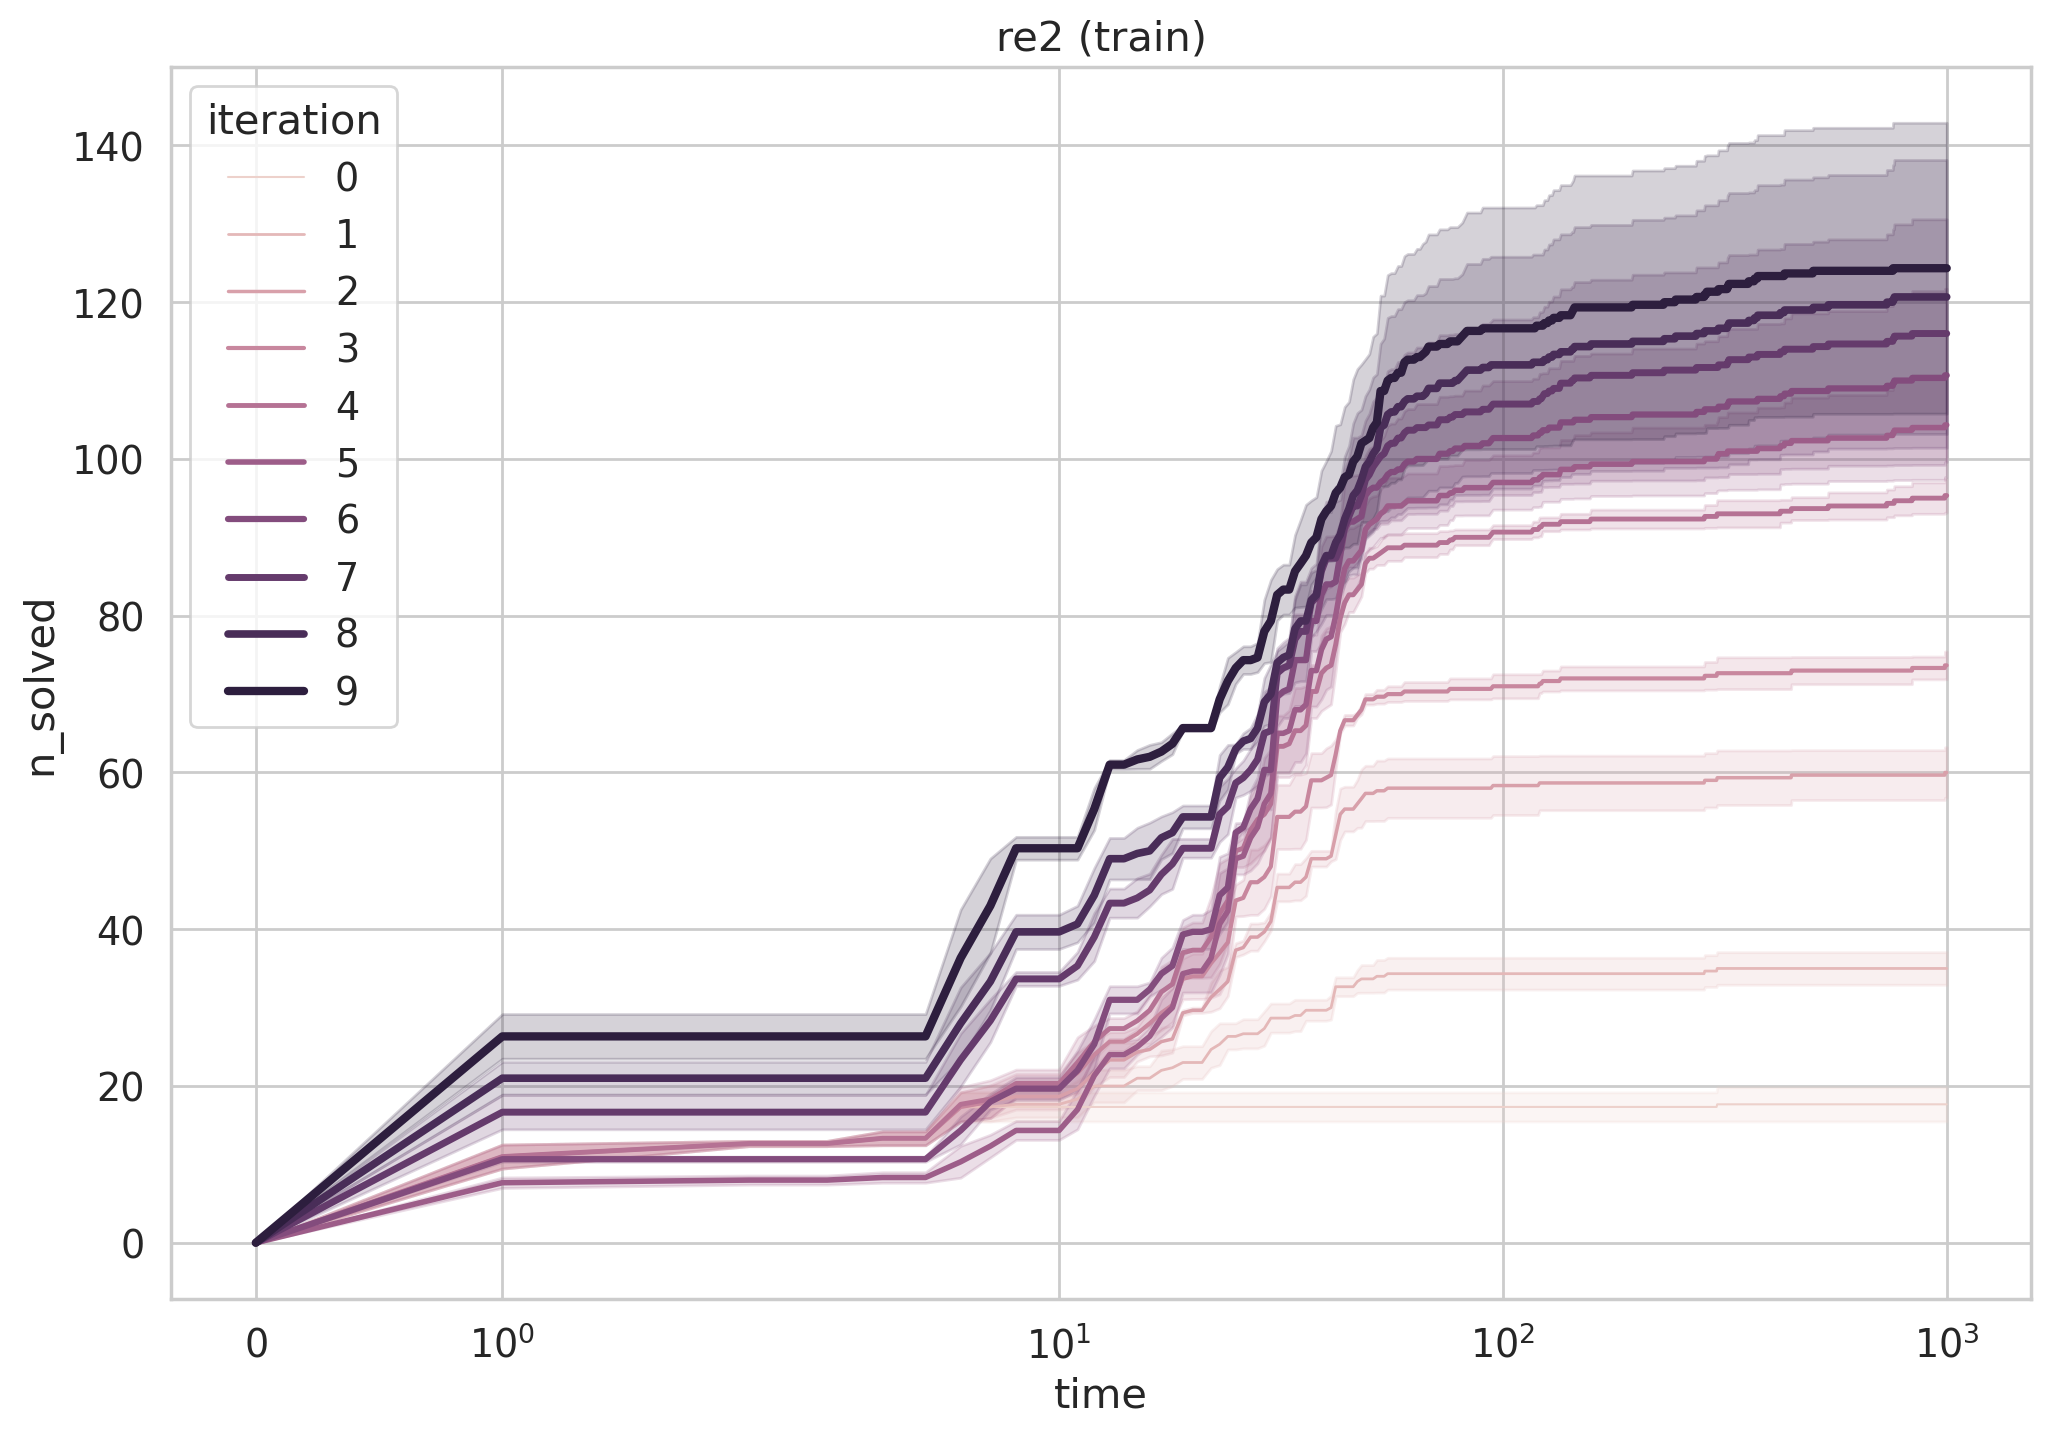

In [45]:
g = sns.lineplot(
    data=df_search_time[df_search_time.split == "train"],
    x="time",
    y="n_solved",
    # hue="seed",
    hue="iteration",
    size="iteration",
    legend="full",
    errorbar="se",
)
g.set(xscale='symlog')
plt.title(f"{DOMAIN} (train)")

Text(0.5, 1.0, 're2 (test)')

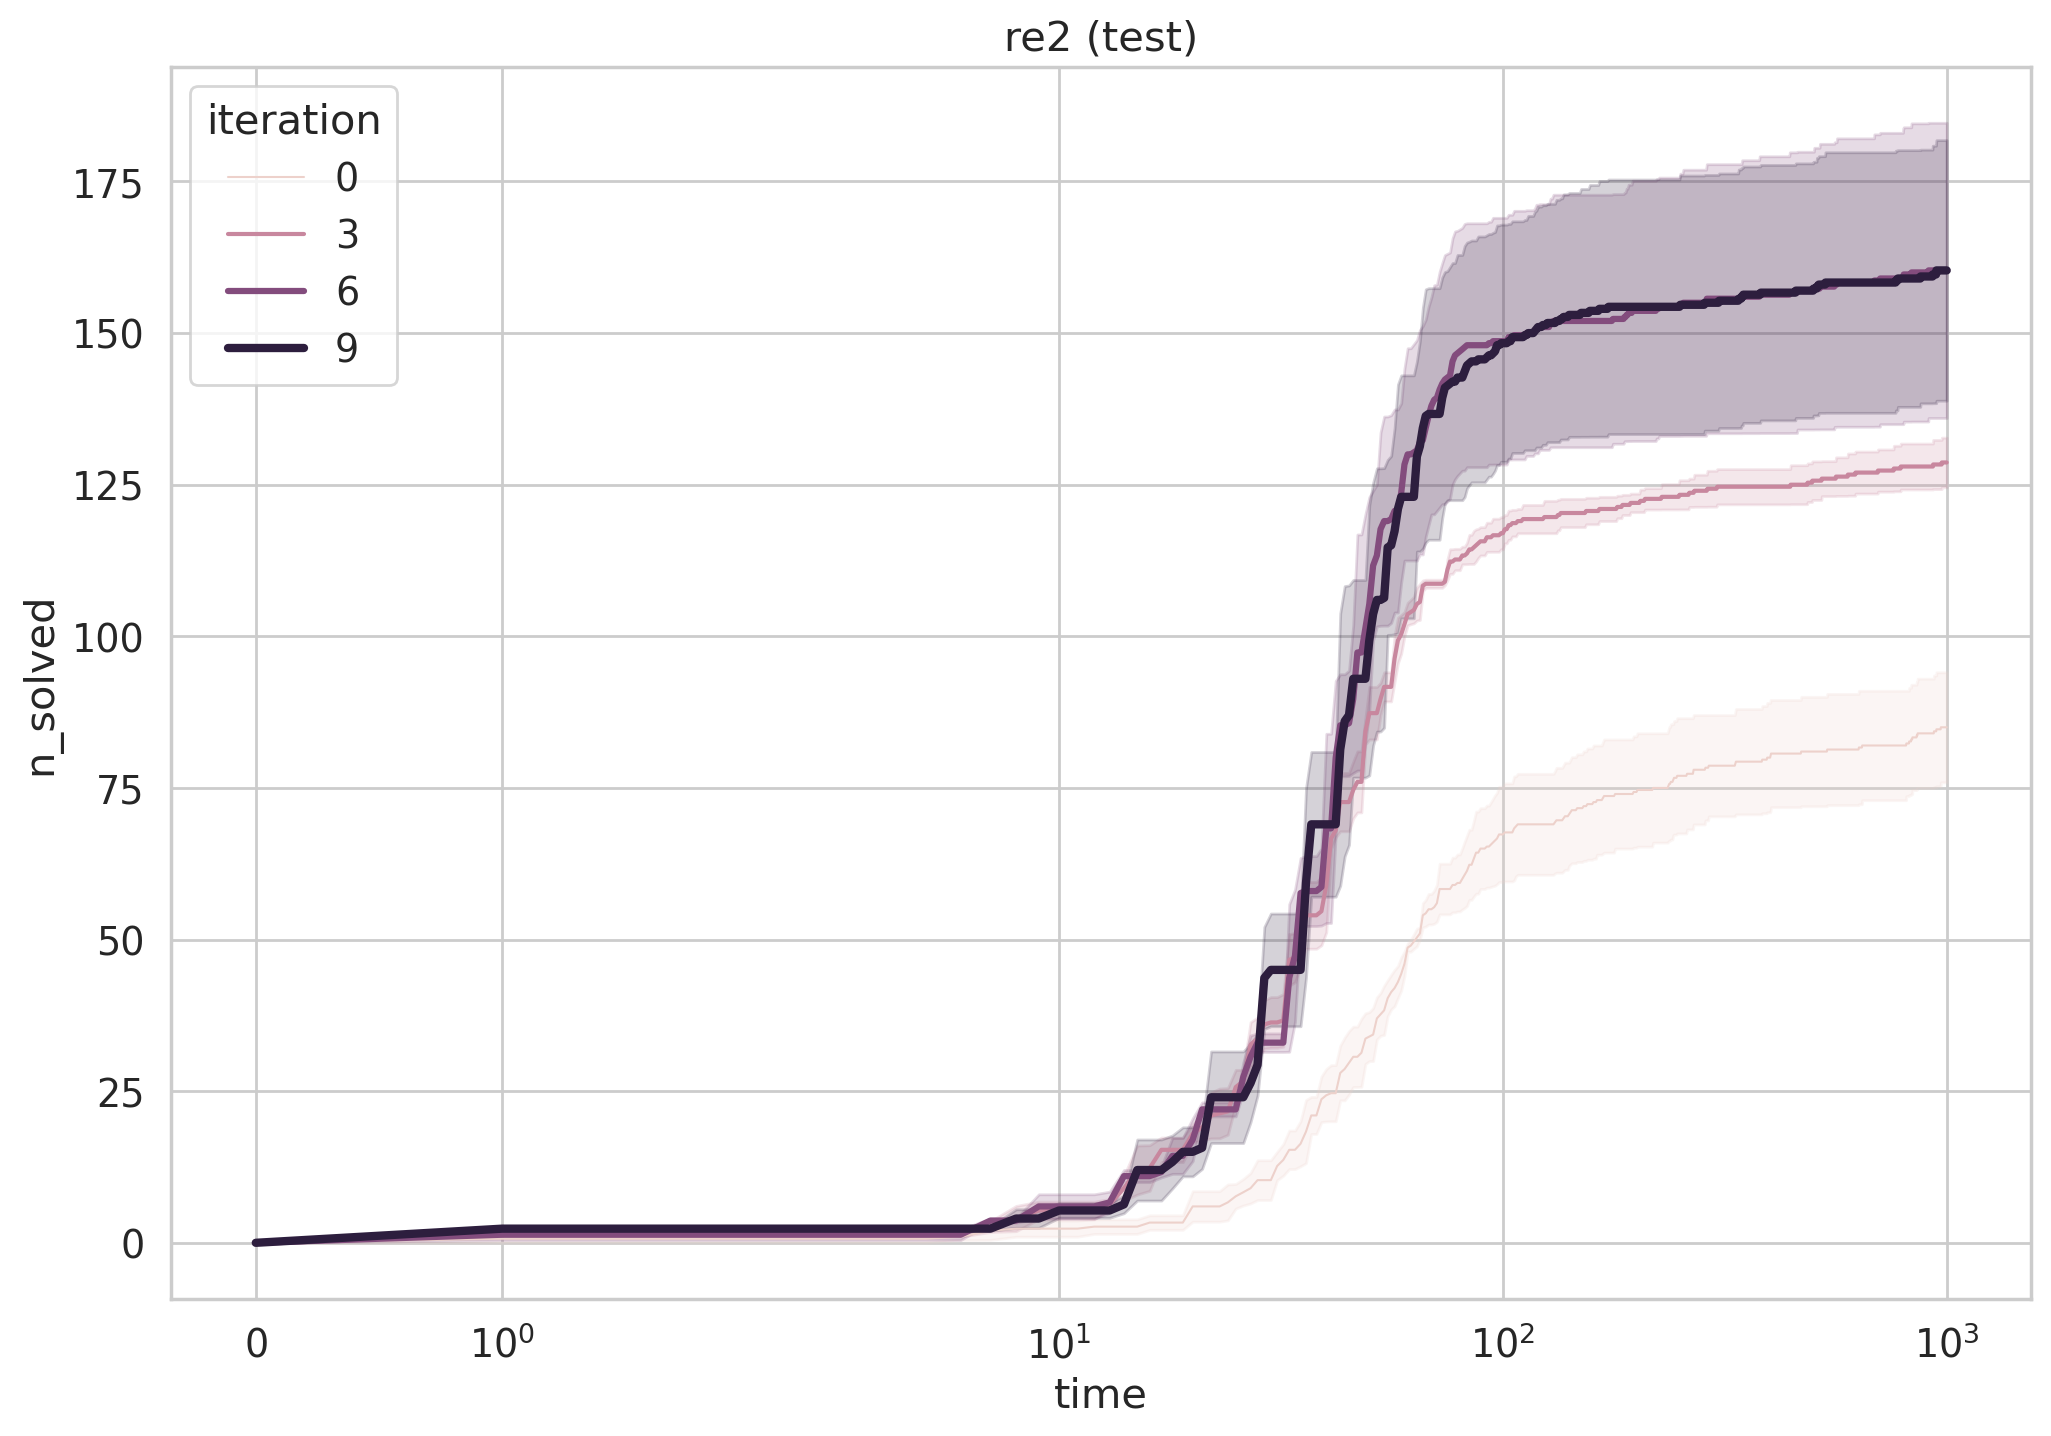

In [46]:
g = sns.lineplot(
    data=df_search_time[df_search_time.split == "test"],
    x="time",
    y="n_solved",
    # hue="seed",
    hue="iteration",
    size="iteration",
    legend="full",
    errorbar="se",
)
g.set(xscale='symlog')
plt.title(f"{DOMAIN} (test)")

# Analysis 2: Library abstractions

In [47]:
df_asbtractions = analyzer.get_abstractions_for_domain(DOMAIN)
df_asbtractions.to_csv(f"{DOMAIN}_abstractions.csv", index=False)
df_asbtractions

,name,arity,utility,compression_ratio,cumulative_compression_ratio,body,dreamcoder,experiment_type,random_seed,iteration,batch_size
0,fn_0,2,2020,1.196021,1.196021,(_rflatten (cons #1 (cdr (_rsplit _rempty #0)))),#(lambda (lambda (_rflatten (cons $0 (cdr (_rs...,baseline_dreamcoder,111,0,96
1,fn_1,2,1212,1.133289,1.355438,(_rflatten (_rappend #1 (_rrevcdr (_rsplit _re...,#(lambda (lambda (_rflatten (_rappend $0 (_rre...,baseline_dreamcoder,111,0,96
2,fn_2,2,909,1.111070,1.505987,(_rflatten (map #1 (_rsplit _rempty #0))),#(lambda (lambda (_rflatten (map $0 (_rsplit _...,baseline_dreamcoder,111,0,96
3,fn_3,2,404,1.051928,1.584190,(_rflatten (cons #1 (cons _a (cdr #0)))),#(lambda (lambda (_rflatten (cons $0 (cons _a ...,baseline_dreamcoder,111,0,96
4,fn_4,1,505,1.069416,1.694158,(_rsplit _rdot #0),#(lambda (_rsplit _rdot $0)),baseline_dreamcoder,111,0,96
...,...,...,...,...,...,...,...,...,...,...,...
293,fn_5,3,909,1.066148,2.352496,(fn_1 (fn_1 #2 _rempty _rempty) #1 #0),#(lambda (lambda (lambda (#(lambda (lambda (la...,baseline_dreamcoder,333,9,96
294,fn_6,2,909,1.070833,2.519130,(fn_2 (_rflatten (cons _rempty (cdr (_rsplit _...,#(lambda (lambda (#(lambda (lambda (lambda (_r...,baseline_dreamcoder,333,9,96
295,fn_7,2,808,1.067193,2.688399,(_rflatten (if (_rmatch (_rtail (_rsplit _rdot...,#(lambda (lambda (_rflatten (if (_rmatch (_rta...,baseline_dreamcoder,333,9,96
296,fn_8,2,606,1.053069,2.831071,(if (_rmatch (_rtail (_rsplit _rdot #1)) _e) #...,#(lambda (lambda (if (_rmatch (_rtail (_rsplit...,baseline_dreamcoder,333,9,96


In [48]:
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None):
    display(df_asbtractions.sort_values(["name", "iteration"])[["name", "iteration", "arity", "compression_ratio", "dreamcoder"]])

,name,iteration,arity,compression_ratio,dreamcoder
0,fn_0,0,2,1.196021,#(lambda (lambda (_rflatten (cons $0 (cdr (_rsplit _rempty $1))))))
100,fn_0,0,2,1.201939,#(lambda (lambda (_rflatten (cons $0 (cdr (_rsplit _rempty $1))))))
199,fn_0,0,2,1.257106,#(lambda (lambda (_rflatten (cons $0 (cdr (_rsplit _rdot $1))))))
10,fn_0,1,3,1.316295,#(lambda (lambda (lambda (_rflatten (cons $0 (cons $1 (cdr (_rsplit _rempty $2))))))))
110,fn_0,1,3,1.267087,#(lambda (lambda (lambda (_rflatten (cons (_rconcat $0 $1) (cdr (_rsplit _rdot $2)))))))
209,fn_0,1,3,1.259923,#(lambda (lambda (lambda (_rflatten (cons $0 (cons $1 (cdr (_rsplit _rdot $2))))))))
20,fn_0,2,3,1.246611,#(lambda (lambda (lambda (_rflatten (cons $0 (cons $1 (cdr (_rsplit _rempty $2))))))))
120,fn_0,2,3,1.272589,#(lambda (lambda (lambda (_rflatten (cons (_rconcat $0 $1) (cdr (_rsplit _rdot $2)))))))
219,fn_0,2,3,1.278628,#(lambda (lambda (lambda (_rflatten (cons $0 (cons $1 (cdr (_rsplit _rdot $2))))))))
30,fn_0,3,3,1.393792,#(lambda (lambda (lambda (_rflatten (_rappend $0 (_rappend $1 (_rrevcdr (_rrevcdr (_rsplit _rdot (_rflatten (_rappend $1 (_rappend _o (_rrevcdr (_rsplit _rdot $2))))))))))))))


<AxesSubplot:xlabel='name', ylabel='compression_ratio'>

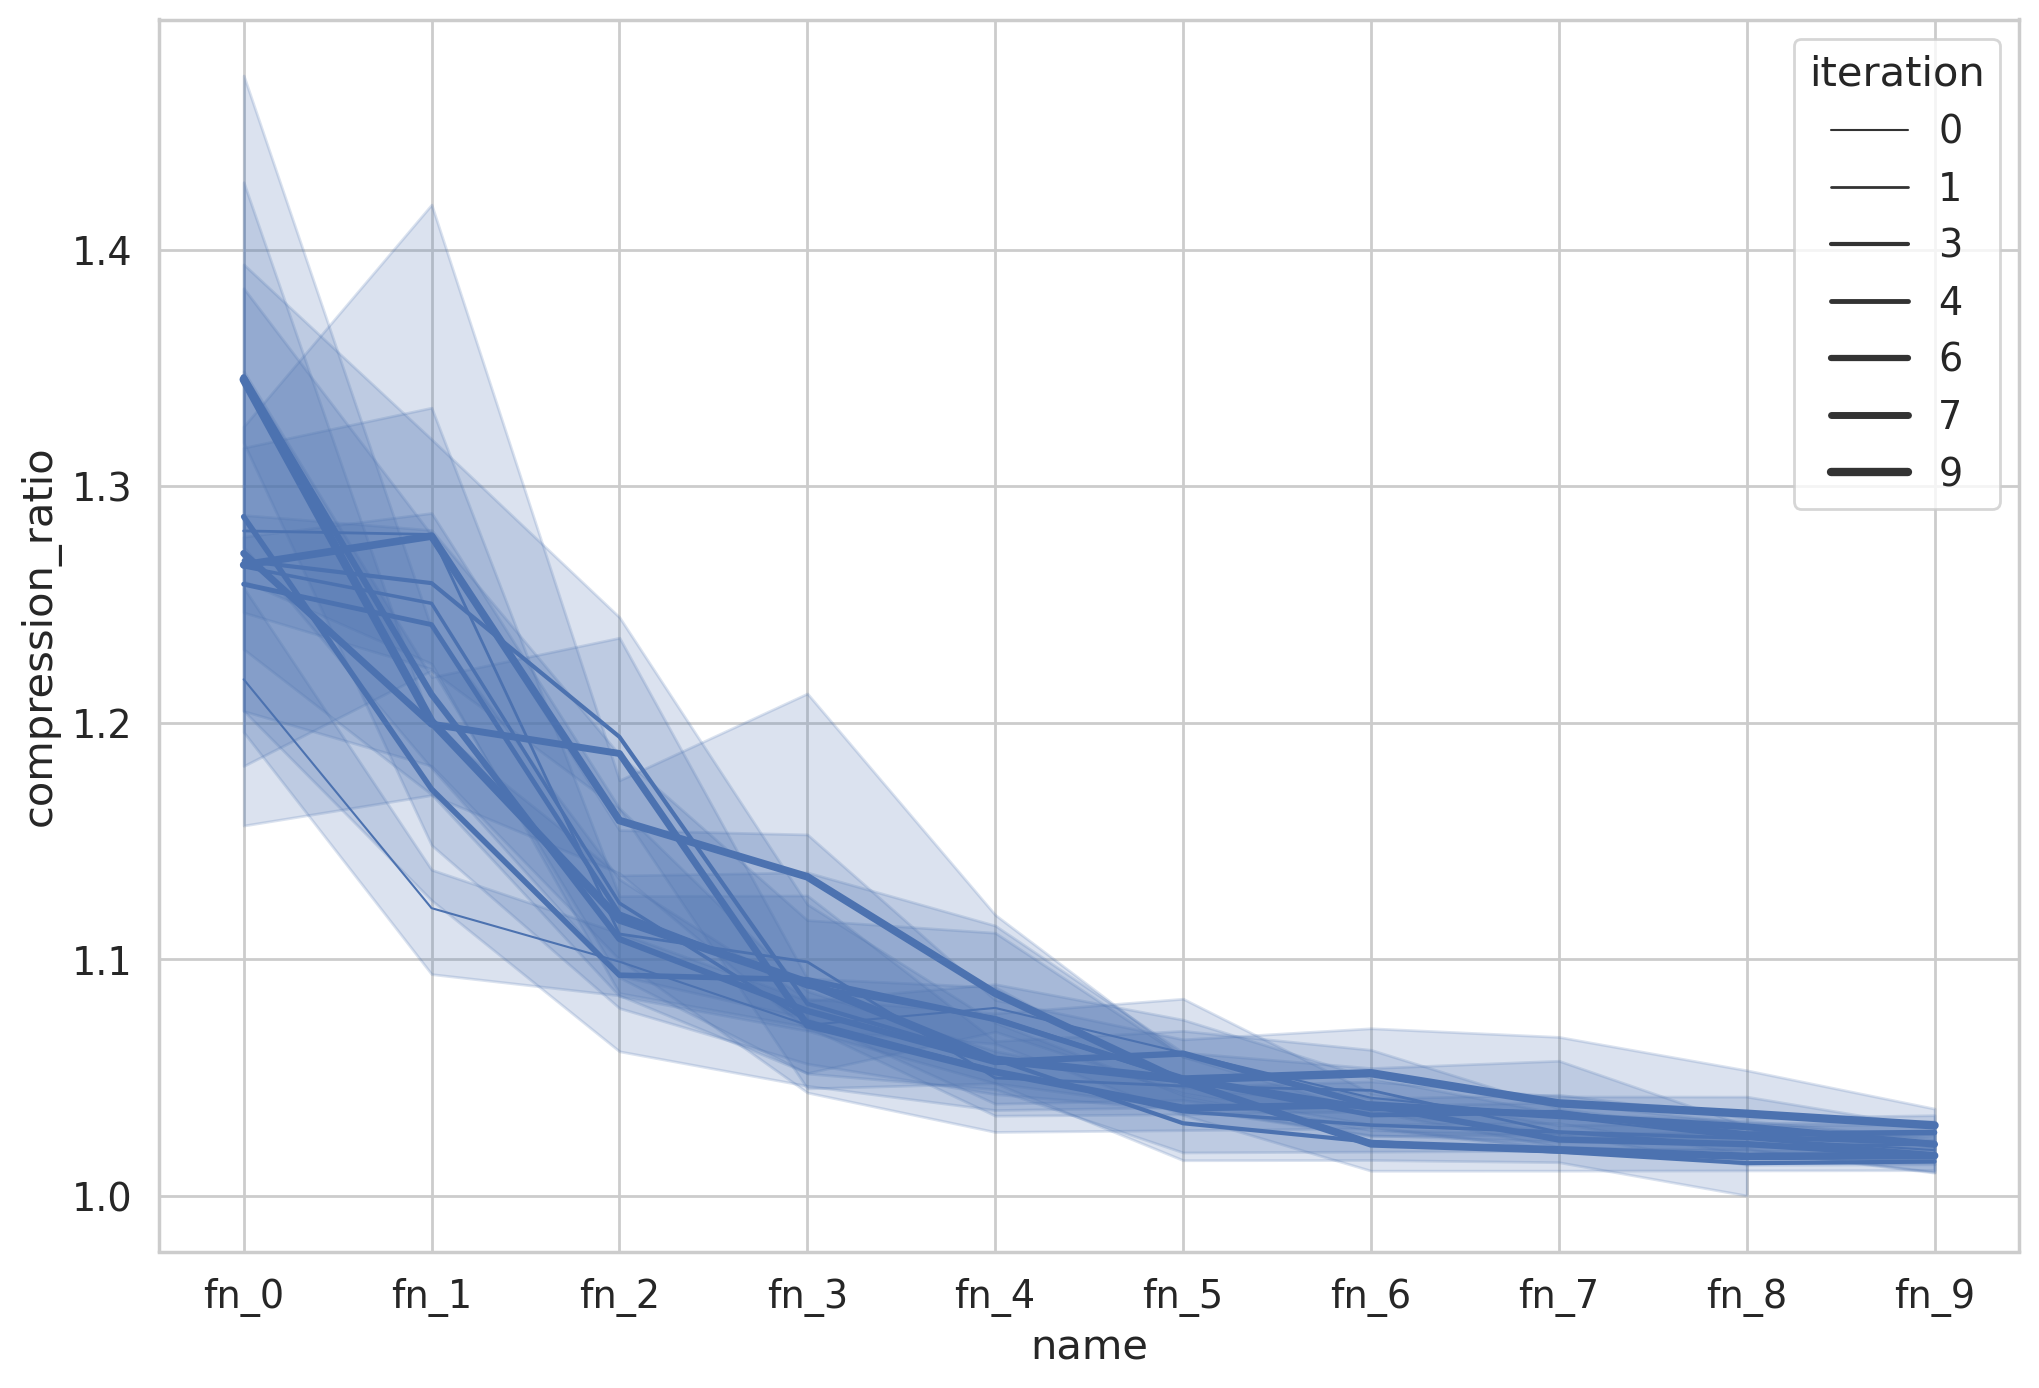

In [49]:
sns.lineplot(data=df_asbtractions, x="name", y="compression_ratio", size="iteration")

Text(0.5, 1.0, 're2 compressivity of library')

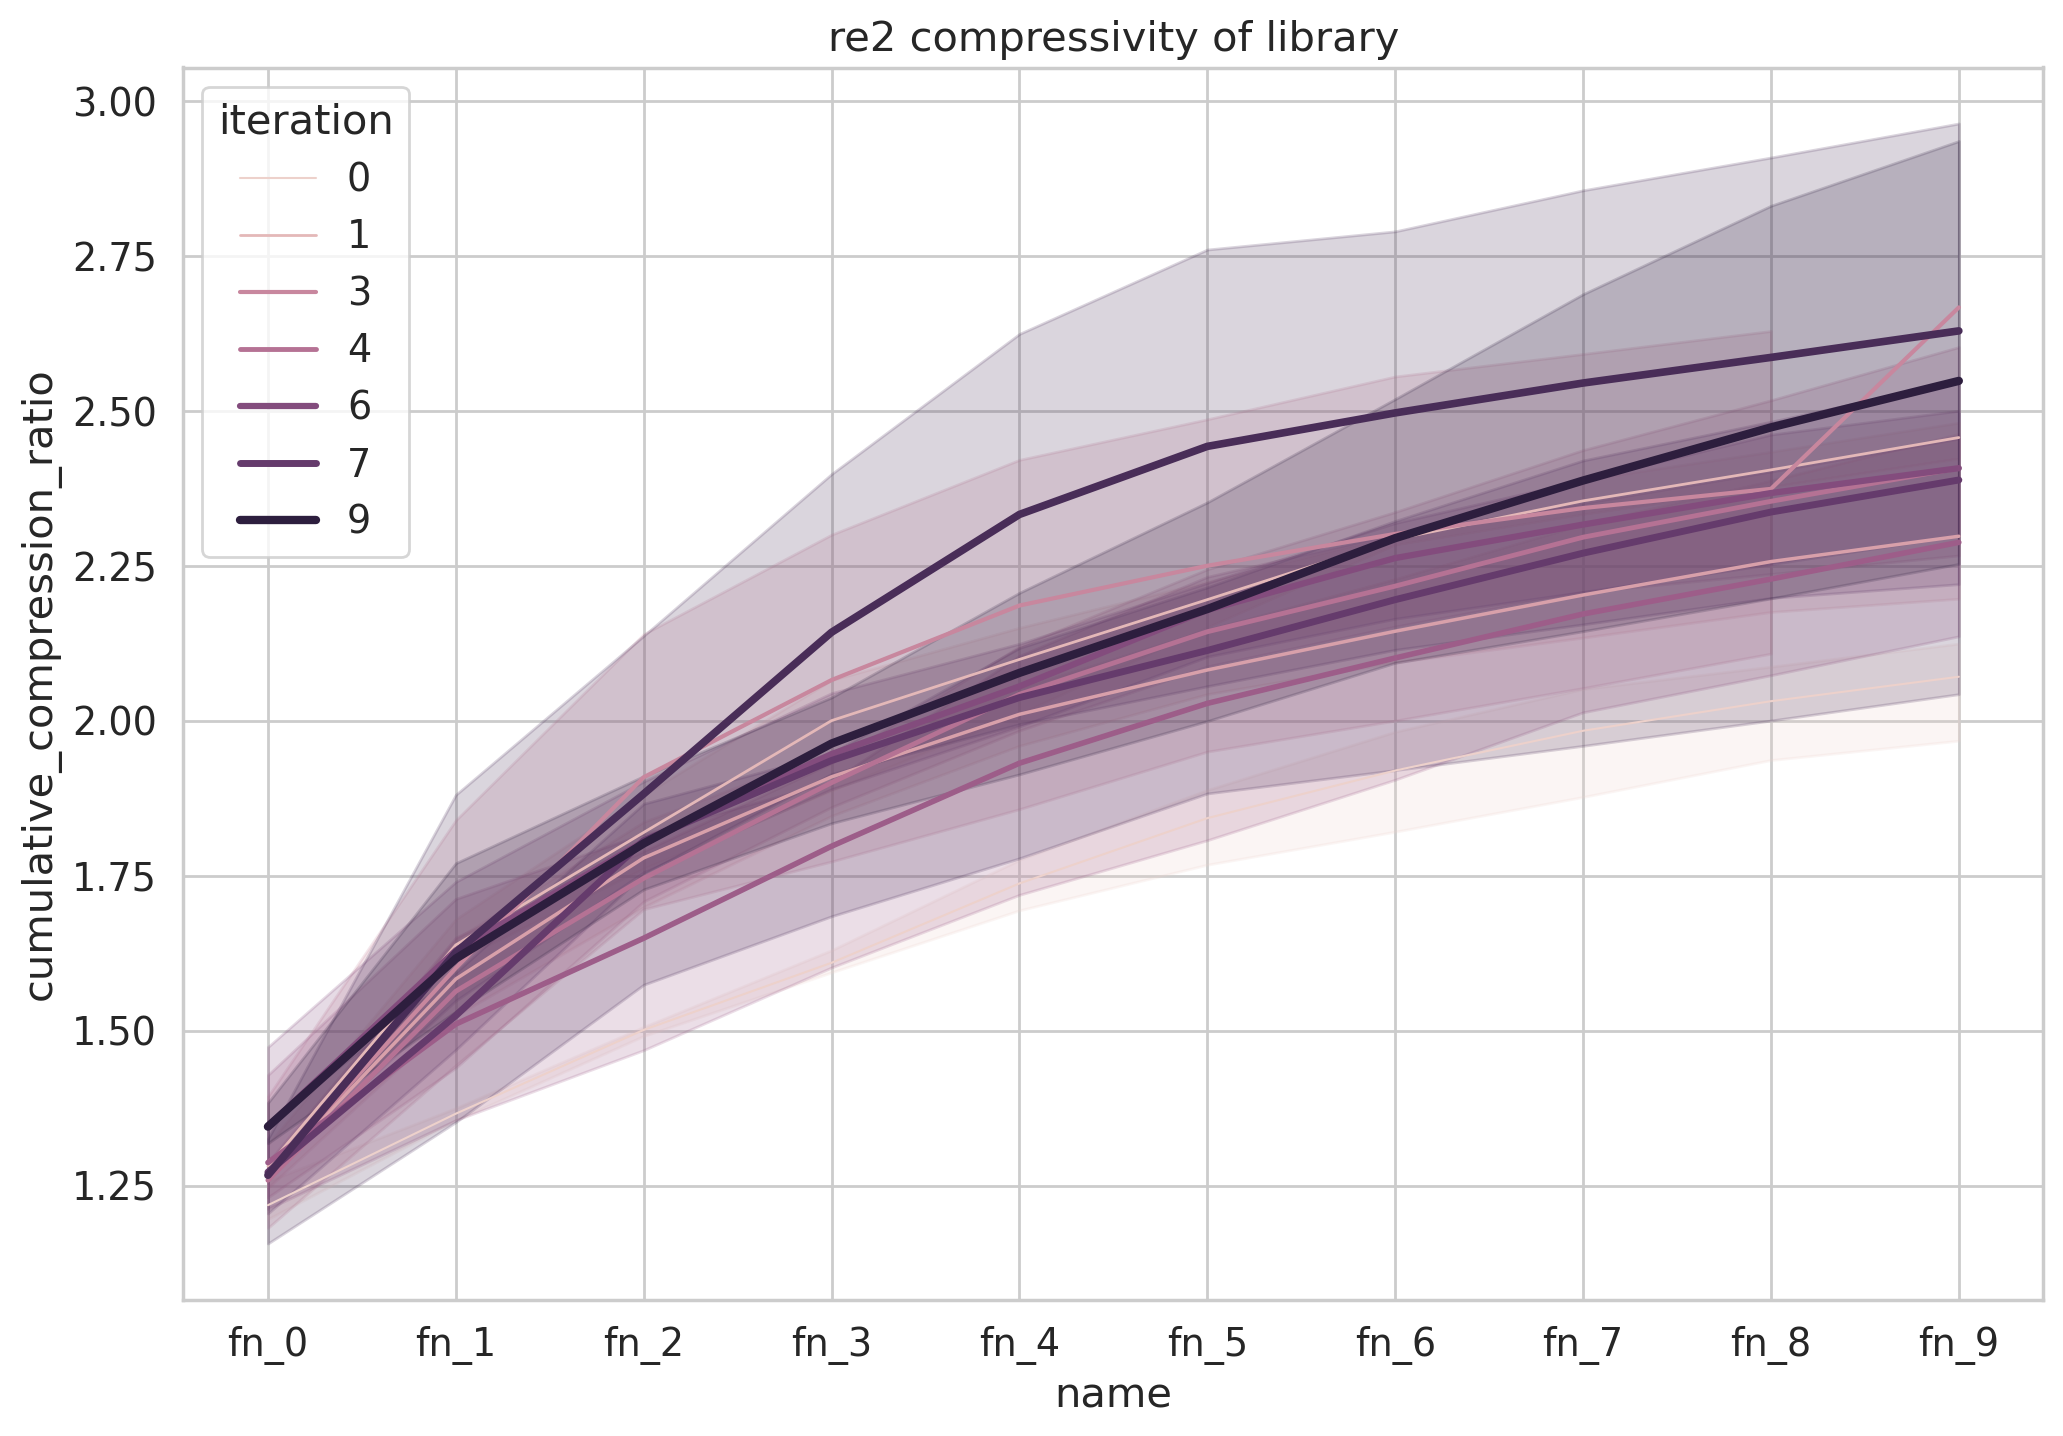

In [50]:
sns.lineplot(data=df_asbtractions, x="name", y="cumulative_compression_ratio", size="iteration", hue="iteration")
plt.title(f"{DOMAIN} compressivity of library")

# Analysis 3: Solved programs

In [51]:
df = analyzer.get_synthesis_results_for_domain(DOMAIN)
df.to_csv(f"{DOMAIN}_search_results.csv")

In [52]:
df[~pd.isnull(df.best_search_time)].query("split == 'train'").query("iteration == 9")

,request,task,programs,best_search_time,split,seed,iteration,experiment_type
5919,"{'constructor': '->', 'arguments': [{'construc...",re2_train_0_if_the_word_ends_with_any_letter_a...,[{'program': '(lambda (#(lambda (lambda (_rfla...,0.000486,train,111,9,baseline_dreamcoder
5922,"{'constructor': '->', 'arguments': [{'construc...",re2_train_3_if_there_is_d_replace_that_with_y,[{'program': '(lambda (#(lambda (lambda (lambd...,41.192231,train,111,9,baseline_dreamcoder
5923,"{'constructor': '->', 'arguments': [{'construc...",re2_train_4_if_there_is_b_add_k_before_that,[{'program': '(lambda (#(lambda (lambda (lambd...,41.280758,train,111,9,baseline_dreamcoder
5930,"{'constructor': '->', 'arguments': [{'construc...",re2_train_11_if_the_word_starts_with_any_lette...,[{'program': '(lambda (#(lambda (lambda (lambd...,5.591696,train,111,9,baseline_dreamcoder
5932,"{'constructor': '->', 'arguments': [{'construc...",re2_train_14_if_there_is_t_replace_that_with_a_x,[{'program': '(lambda (#(lambda (lambda (#(lam...,144.458304,train,111,9,baseline_dreamcoder
...,...,...,...,...,...,...,...,...
20217,"{'constructor': '->', 'arguments': [{'construc...",re2_train_487_if_the_word_starts_with_consonan...,[{'program': '(lambda (#(lambda (lambda (_rfla...,12.836090,train,333,9,baseline_dreamcoder
20220,"{'constructor': '->', 'arguments': [{'construc...",re2_train_490_if_there_is_any_letter_replace_t...,[{'program': '(lambda (#(lambda (lambda (_rfla...,0.000570,train,333,9,baseline_dreamcoder
20221,"{'constructor': '->', 'arguments': [{'construc...",re2_train_491_if_the_word_ends_with_any_letter...,[{'program': '(lambda (#(lambda (lambda (lambd...,0.000827,train,333,9,baseline_dreamcoder
20224,"{'constructor': '->', 'arguments': [{'construc...",re2_train_494_if_the_word_starts_with_any_lett...,[{'program': '(lambda (#(lambda (lambda (lambd...,7.581646,train,333,9,baseline_dreamcoder


In [53]:
df[~pd.isnull(df.best_search_time)].query("split == 'train'").query("iteration == 9").task.sort_values()

5919     re2_train_0_if_the_word_ends_with_any_letter_a...
12829    re2_train_0_if_the_word_ends_with_any_letter_a...
19739    re2_train_0_if_the_word_ends_with_any_letter_a...
6020     re2_train_103_if_the_word_starts_with_any_lett...
12930    re2_train_103_if_the_word_starts_with_any_lett...
                               ...                        
5995     re2_train_78_if_the_word_starts_with_any_lette...
19818    re2_train_81_if_the_word_starts_with_any_lette...
12908    re2_train_81_if_the_word_starts_with_any_lette...
5998     re2_train_81_if_the_word_starts_with_any_lette...
6016      re2_train_99_if_there_is_t_replace_that_with_d_q
Name: task, Length: 373, dtype: object